In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import json

# ✅ Define LayoutGAN Model (Same as Training)
class LayoutGAN(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=128, output_dim=4):
        super(LayoutGAN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LayoutGAN().to(device)

# ✅ Load Trained Weights
model.load_state_dict(torch.load("layoutgan_resume.pth", map_location=device))
model.eval()


LayoutGAN(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)

In [2]:
def generate_resume_layout():
    """
    Generates a structured resume layout with predefined sections.
    """
    sections = {
        "Header": [0.1, 0.05, 0.8, 0.1],
        "Summary": [0.1, 0.16, 0.8, 0.1],
        "Certifications": [0.1, 0.27, 0.8, 0.08],
        "Clinical Experience": [0.1, 0.36, 0.8, 0.15],
        "Education": [0.1, 0.52, 0.8, 0.1],
        "Skills": [0.1, 0.63, 0.8, 0.08],
        "Publications": [0.1, 0.72, 0.8, 0.1],
        "Conferences": [0.1, 0.83, 0.8, 0.07],
        "Awards": [0.1, 0.91, 0.8, 0.07]
    }

    # Convert to tensor for LayoutGAN processing
    section_tensors = torch.tensor(list(sections.values()), dtype=torch.float32).to(device)

    # Generate layout adjustments using the trained model
    with torch.no_grad():
        adjusted_layout = model(section_tensors).cpu().numpy()

    # Assign adjusted values back to sections
    generated_layout = {section: adjusted_layout[i].tolist() for i, section in enumerate(sections)}

    return generated_layout

# ✅ Generate Resume Layout
resume_layout = generate_resume_layout()
print("Generated Resume Layout:\n", json.dumps(resume_layout, indent=4))


Generated Resume Layout:
 {
    "Header": [
        0.3411751389503479,
        0.10880887508392334,
        0.5773817896842957,
        0.1680677980184555
    ],
    "Summary": [
        0.3190702795982361,
        0.14145588874816895,
        0.5754280090332031,
        0.20898498594760895
    ],
    "Certifications": [
        0.2943089008331299,
        0.1668642908334732,
        0.572407066822052,
        0.24328123033046722
    ],
    "Clinical Experience": [
        0.2814157009124756,
        0.23292303085327148,
        0.5739197731018066,
        0.30893954634666443
    ],
    "Education": [
        0.25160762667655945,
        0.27734920382499695,
        0.5592445731163025,
        0.3637565076351166
    ],
    "Skills": [
        0.23731181025505066,
        0.3156798183917999,
        0.5528486371040344,
        0.4071761667728424
    ],
    "Publications": [
        0.23108282685279846,
        0.3667868375778198,
        0.5522173643112183,
        0.46308961510658264


/tmp/ipykernel_3956/2937127820.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((margin_x, y_start), max_width, section_height, fill=True,


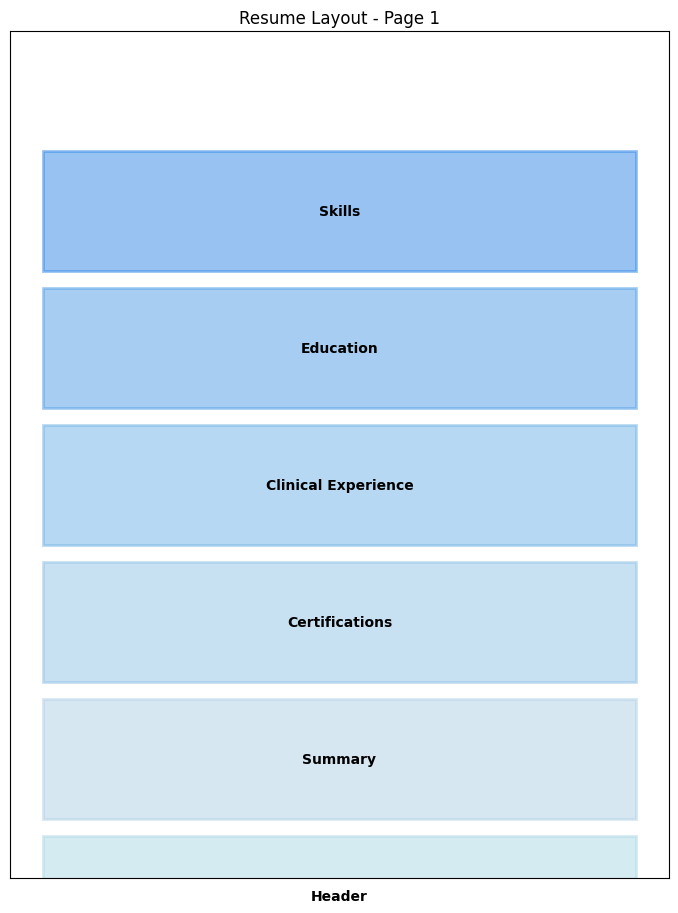

/tmp/ipykernel_3956/2937127820.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect1 = plt.Rectangle((margin_x, y_start), max_width / 2 - 0.02, section_height, fill=True,
/tmp/ipykernel_3956/2937127820.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect2 = plt.Rectangle((margin_x + max_width / 2 + 0.02, y_start), max_width / 2 - 0.02, section_height,


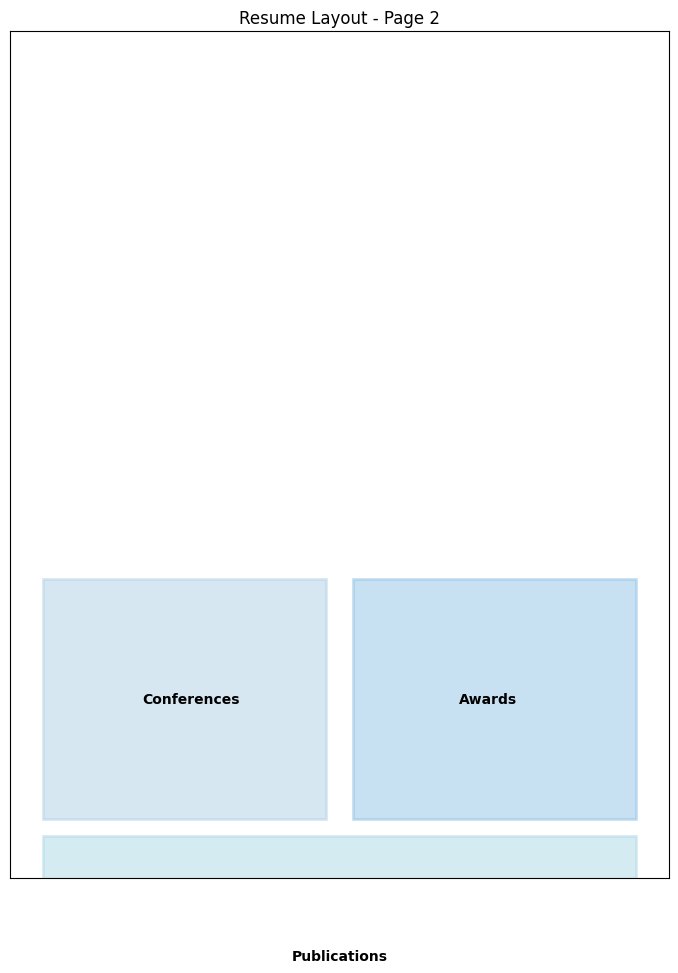

In [8]:
import matplotlib.pyplot as plt

def plot_optimized_resume_layout(resume_sections, sections_per_page=6):
    """
    Generates a paginated resume layout that dynamically adjusts section placement
    to reduce whitespace and optimize space usage.
    """
    side_by_side_groups = {
        "Skills": "Certifications",
        "Conferences": "Awards"
    }  # Define sections that should be side-by-side when possible

    total_sections = len(resume_sections)
    pages = [resume_sections[i:i + sections_per_page] for i in range(0, total_sections, sections_per_page)]

    for page_num, page in enumerate(pages, start=1):
        fig, ax = plt.subplots(figsize=(8.5, 11))  # Standard resume page size
        
        y_start = 0.95  # Start placement from near the top
        section_height = 0.85 / len(page)  # Dynamically distribute height
        max_width = 0.9  # Maximum section width
        margin_x = 0.05  # Margin from the left

        colors = ["#add8e6", "#b0d0e6", "#90c2e6", "#70b3e6", "#509ee6", "#3087e6", "#1071e6", "#0051c4", "#003db3"]

        index = 0
        while index < len(page):
            section = page[index]
            next_section = page[index + 1] if index + 1 < len(page) else None
            is_side_by_side = next_section and (section in side_by_side_groups and side_by_side_groups[section] == next_section) or \
                              (next_section in side_by_side_groups and side_by_side_groups[next_section] == section)

            if is_side_by_side:
                # Side-by-side layout
                rect1 = plt.Rectangle((margin_x, y_start), max_width / 2 - 0.02, section_height, fill=True,
                                      edgecolor="black", linewidth=2, alpha=0.5, color=colors[index % len(colors)])
                ax.add_patch(rect1)
                ax.text(margin_x + (max_width / 4), y_start + section_height / 2, section,
                        ha="center", va="center", fontsize=10, weight="bold", color="black")

                rect2 = plt.Rectangle((margin_x + max_width / 2 + 0.02, y_start), max_width / 2 - 0.02, section_height,
                                      fill=True, edgecolor="black", linewidth=2, alpha=0.5, color=colors[(index + 1) % len(colors)])
                ax.add_patch(rect2)
                ax.text(margin_x + (3 * max_width / 4), y_start + section_height / 2, next_section,
                        ha="center", va="center", fontsize=10, weight="bold", color="black")

                y_start -= section_height + 0.02  # Move down
                index += 2  # Skip next since it's placed
            else:
                # Full-width section
                rect = plt.Rectangle((margin_x, y_start), max_width, section_height, fill=True,
                                     edgecolor="black", linewidth=2, alpha=0.5, color=colors[index % len(colors)])
                ax.add_patch(rect)
                ax.text(margin_x + max_width / 2, y_start + section_height / 2, section,
                        ha="center", va="center", fontsize=10, weight="bold", color="black")

                y_start -= section_height + 0.02  # Move down
                index += 1  # Move to next section

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.gca().invert_yaxis()  # Flip Y-axis for document-style layout
        plt.title(f"Resume Layout - Page {page_num}")

        plt.show()

# Define Resume Sections
resume_sections = [
    "Header", "Summary", "Certifications", "Clinical Experience",
    "Education", "Skills", "Publications", "Conferences", "Awards"
]

# Generate the optimized layout
plot_optimized_resume_layout(resume_sections)
